#Index Used cars pricing:
*   Load data
*   Data wrangling
  *   Identify, count and deal with missing values
  *   Data standardization and normalization
  *   Binning
  *   Indicator variable
*   Exploratory data analysis
  *   Continuous numerical variables and categorical variables
  *   Descriptive statistical analysis
  *   Conclusion - important variables
*   Model Development
  *   Linear Regression and Multiple Linear Regression
  *   Model Evaluation Using Visualization
  *   Polynomial Regression and Pipelines
  *   Measures for In-Sample Evaluation
  *   Prediction and Decision Making
*   Model Evaluation and refinement
  *   Ridge Regression
  *   Grid Search





















The dataset used is related to used cars. It may include various attributes of used cars, such as price, make, model, year, mileage, and other relevant features.

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

#Load data

In [162]:
file_path="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df = pd.read_csv(file_path, names = headers)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


#Data wrangling

##Identify and handle missing values

In [163]:
# replace "?" to NaN
df.replace("?", np.nan, inplace = True)

###Identify Missing Data


In [164]:
missing_data = df.isnull() #or df.notnull()

###Count missing values in each column
Using a for loop in Python, I can quickly figure out the number of missing values in each column. "True" represents a missing value and "False" means the value is present in the data set.

In [ ]:
for column in missing_data.columns.values.tolist():
    print (missing_data[column].value_counts())
    print("")

##Deal with missing data
How should I deal with missing data?

- Drop data

  a. Drop the whole row

  b. Drop the whole column

- Replace data

  a. Replace it by mean

  b. Replace it by frequency

  c. Replace it based on other functions

Replace by mean:

- "normalized-losses": 41 missing data, replace them with mean

- "stroke": 4 missing data, replace them with mean

- "bore": 4 missing data, replace them with mean

- "horsepower": 2 missing data, replace them with mean

- "peak-rpm": 2 missing data, replace them with mean

Replace by frequency:

- "num-of-doors": 2 missing data, replace them with "four".

  Reason: 84% sedans are four doors. Since four doors is most frequent, it is most likely to occur

Drop the whole row:

- "price": 4 missing data, simply delete the whole row

  Reason: I want to predict price. I cannot use any data entry without price data for prediction; therefore any row without price data is not useful.

In [166]:
#Calculate the mean value for the "normalized-losses" column
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


In [167]:
#Replace "NaN" with mean value in "normalized-losses" column
df['normalized-losses']=df['normalized-losses'].replace(np.nan,avg_norm_loss)

In [168]:
#Calculate the mean value for the "bore" column
avg_bore=df['bore'].astype(float).mean(axis=0)
print('Average of bore:',avg_bore)

Average of bore: 3.3297512437810943


In [169]:
#Replace "NaN" with the mean value in the "bore" column
df['bore']=df['bore'].replace(np.nan,avg_bore)

In [170]:
#replace NaN in "stroke" column with the mean value
avg_stroke=df['stroke'].astype(float).mean(axis=0)
df['stroke']=df['stroke'].replace(np.nan,avg_stroke)

In [171]:
#replace NaN in "horsepower" column with the mean value
avg_stroke=df['horsepower'].astype(float).mean(axis=0)
df['horsepower']=df['horsepower'].replace(np.nan,avg_stroke)

In [172]:
#replace NaN in "peak-rpm" column with the mean value
avg_stroke=df['peak-rpm'].astype(float).mean(axis=0)
df['peak-rpm']=df['peak-rpm'].replace(np.nan,avg_stroke)

In [173]:
#calculate the frequency for the "num-of-doors" column
df['num-of-doors'].value_counts()
df['num-of-doors']=df['num-of-doors'].replace(np.nan,"four")

In [174]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [ ]:
#check data type
df.dtypes

In [176]:
#convert data type to proper format
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

##Data Standardization
Data usually come from different agencies in different formats. (Data standardization is also a term for a particular type of data normalization where you subtract the mean and divide by the standard deviation.)

###What is standardization?

Standardization is the process of transforming data into a common format, allowing the researcher to make the meaningful comparison.

In [189]:
#transform mpg (miles per gallon) to L/100km (new columns: "city-L/100km", "highway-L/100km")
df['city-L/100km']=235/df['city-mpg']
df['highway-L/100km']=235/df['highway-mpg']

##Data Normalization
###Why normalization?

Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include:

- scaling the variable so the variable average is 0

- scaling the variable so the variance is 1

- scaling the variable so the variable values range from 0 to 1

In [190]:
#normalize the columns "length", "width" and "height" so their value ranges from 0 to 1.
#Replace the original value by (original value)/(maximum value)
df['length']=df['length']/df['length'].max()
df['height']=df['height']/df['height'].max()
df['width']=df['width']/df['width'].max()

In [191]:
df[['height','length','width']].head()

,height,length,width
0,0.816054,0.811148,0.890278
1,0.816054,0.811148,0.890278
2,0.876254,0.822681,0.909722
3,0.908027,0.848630,0.919444
4,0.908027,0.848630,0.922222


##Binning
###Why binning?

Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.

In the data set, "horsepower" is a real valued variable ranging from 48 to 288 and it has 59 unique values. What if you only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? I can rearrange them into three ‘bins' to simplify analysis.

Text(0.5, 1.0, 'horsepower bins')

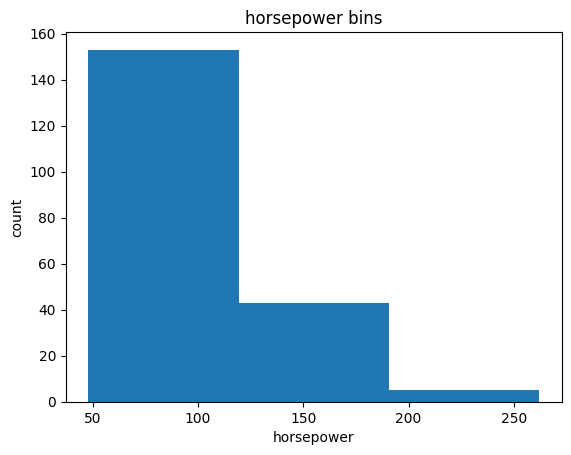

In [180]:
#Convert data to correct format:
df["horsepower"]=df["horsepower"].astype(int, copy=True)
%matplotlib inline
plt.hist(df["horsepower"],bins=3)

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

In [ ]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
group_names = ['Low', 'Medium', 'High']
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

In [182]:
#see the number of vehicle for each bin
df["horsepower-binned"].value_counts()

,count
horsepower-binned,
Low,153
Medium,43
High,5


Text(0.5, 1.0, 'horsepower bins')

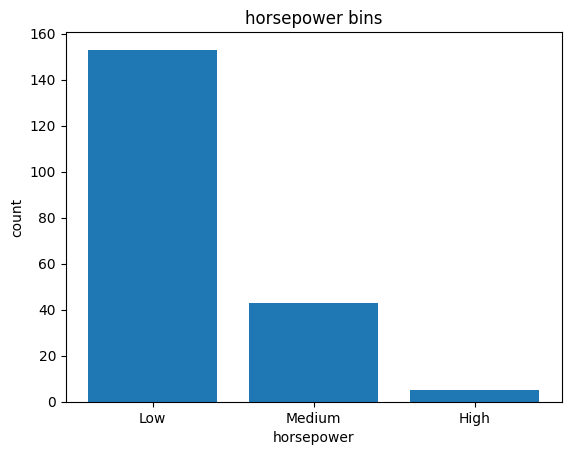

In [183]:
#plot the distribution of the new column
plt.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

##Indicator Variable
###What is an indicator variable?

An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning.

###Why use indicator variables?

I use indicator variables so I can use categorical variables for regression analysis in the later modules.

In [ ]:
dummy_variable_1 = pd.get_dummies(df['fuel-type'])
#change the name for clarity
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

In [185]:
# merge data frame "df" and "dummy_variable_1"
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [186]:
#create an indicator variable for the column "aspiration"
dummy_variable_2=pd.get_dummies(df['aspiration'])
dummy_variable_2.rename(columns={'std':'aspiration-std','turbo':'aspiration-turbo'},inplace=True)
df=pd.concat([df,dummy_variable_2],axis=1)
df.drop('aspiration',axis=1,inplace=True)

In [195]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,13495.0,11.190476,8.703704,Low,False,True,True,False
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,16500.0,11.190476,8.703704,Low,False,True,True,False
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,19,26,16500.0,12.368421,9.038462,Medium,False,True,True,False
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,24,30,13950.0,9.791667,7.833333,Low,False,True,True,False
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,18,22,17450.0,13.055556,10.681818,Low,False,True,True,False


##Save the new file

In [188]:
df.to_csv('clean_df.csv')

#Exploratory data analysis


What is the data type of the column "peak-rpm"?

In [ ]:
print(df.dtypes)

Find the correlation between the following columns: bore, stroke, compression-ratio, and horsepower.

In [197]:
print(df[['bore','stroke','compression-ratio','horsepower']].corr())

                       bore    stroke  compression-ratio  horsepower
bore               1.000000 -0.055390           0.001263    0.566903
stroke            -0.055390  1.000000           0.187871    0.098128
compression-ratio  0.001263  0.187871           1.000000   -0.214489
horsepower         0.566903  0.098128          -0.214489    1.000000


##Continuous Numerical Variables
Continuous numerical variables are variables that may contain any value within some range. They can be of type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.

In order to start understanding the (linear) relationship between an individual variable and the price, we can use "regplot" which plots the scatterplot plus the fitted regression line for the data. This will be useful later on for visualizing the fit of the simple linear regression model as well.

Let's find the scatterplot of "engine-size" and "price", "highway-mpg" and "price", "peak-rpm" and "price".

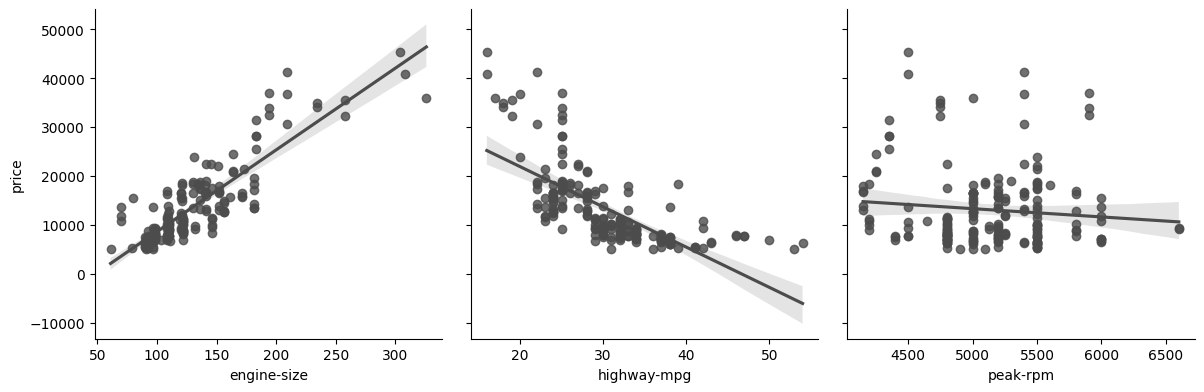

In [201]:
g = sns.PairGrid(df, y_vars=["price"], x_vars=["engine-size", "highway-mpg",'peak-rpm'], height=4)
g.map(sns.regplot, color=".3")

Left Figure: as the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.

Central Figure: As highway-mpg goes up, the price goes down: this indicates an inverse/negative relationship between these two variables. Highway mpg could potentially be a predictor of price.

Right Figure: Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore, it's not a reliable variable.

We can examine the correlation between 'engine-size', 'highway-mpg, 'peak-rpm'  and 'price' and see that it's approximately 0.87, -0.704 and -0.101 respectively.

In [205]:
print(df[["engine-size",'highway-mpg','peak-rpm', "price"]].corr()['price'])

engine-size    0.872335
highway-mpg   -0.704692
peak-rpm      -0.101616
price          1.000000
Name: price, dtype: float64


In [40]:
#Find the correlation between x="stroke" and y="price".
df[['stroke','price']].corr()

,stroke,price
stroke,1.000000,0.082269
price,0.082269,1.000000


There is a weak correlation between the variable 'stroke' and 'price.' as such regression will not work well. We can see this using "regplot" to demonstrate this.


<Axes: xlabel='stroke', ylabel='price'>

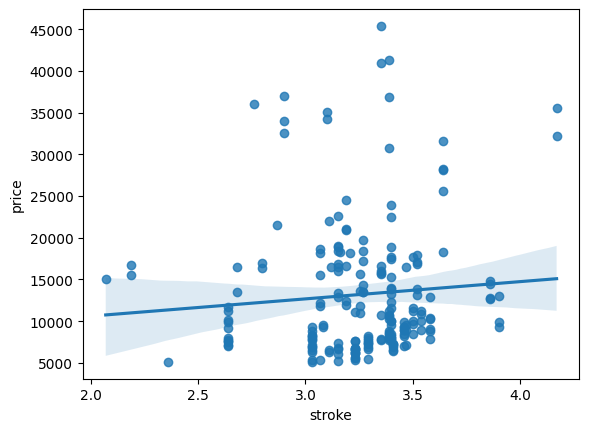

In [41]:
sns.regplot(x="stroke", y="price", data=df)

##Categorical Variables
These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.

Let's look at the relationship between
- "body-style" and "price"
- "engine-location" and "price"
- "drive-wheels" and "price

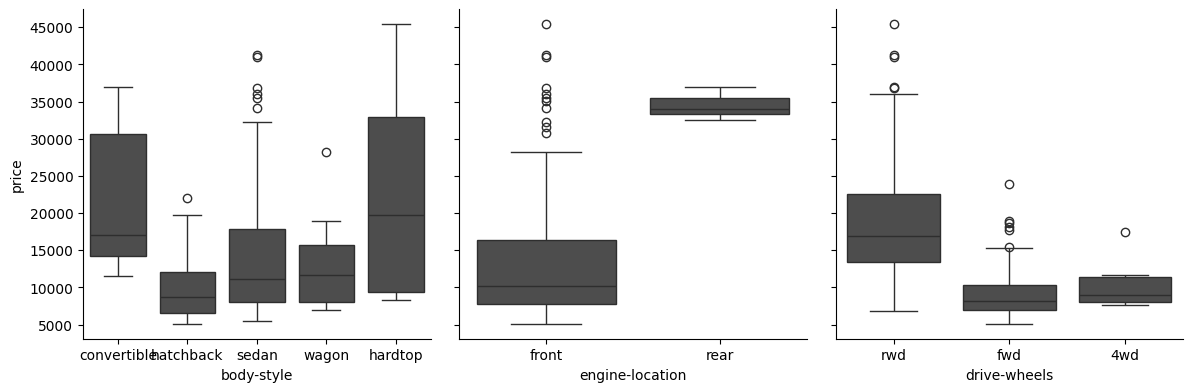

In [206]:
g = sns.PairGrid(df, y_vars=["price"], x_vars=["body-style", "engine-location",'drive-wheels'], height=4)
g.map(sns.boxplot, color=".3")

Left Figure: we see that the distributions of price between the different body-style categories have a significant overlap, so body-style would not be a good predictor of price.

Central Figure: here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.

Right Figure: we see that the distribution of price between the different drive-wheels categories differs. As such, drive-wheels could potentially be a predictor of price.


##Descriptive Statistical Analysis
Let's first take a look at the variables by utilizing a description method.

The describe function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.

This will show:

the count of that variable, the mean, the standard deviation (std), the minimum value, the IQR (Interquartile Range: 25%, 50% and 75%), the maximum value

In [ ]:
print(df.describe())
print(df.describe(include=['object']))

In [207]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,count
engine-location,
front,198
rear,3


After examining the value counts of the engine location, we see that engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, so this result is skewed. Thus, we are not able to draw any conclusions about the engine location.

##Basics of Grouping
The "groupby" method groups data by different categories. The data is grouped based on one or several variables, and analysis is performed on the individual groups.

For example, let's group by the variable "drive-wheels". We see that there are 3 different categories of drive wheels.

If we want to know, on average, which type of drive wheel is most valuable, we can group "drive-wheels" and then average them.

We can select the columns 'drive-wheels', 'body-style' and 'price', then assign it to the variable "df_group_one".

We can then calculate the average price for each of the different categories of data.

In [208]:
print('different categories',df['drive-wheels'].unique())
df_group_one = df[['drive-wheels','body-style','price']]
# grouping results
df_grouped = df_group_one.groupby(['drive-wheels'], as_index=False).agg({'price': 'mean'})
df_grouped

different categories ['rwd' 'fwd' '4wd']


,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


From our data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.

You can also group by multiple variables. For example, let's group by both 'drive-wheels' and 'body-style'. This groups the dataframe by the unique combination of 'drive-wheels' and 'body-style'. We can store the results in the variable 'grouped_test1'.

In [209]:
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


This grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. We can convert the dataframe to a pivot table using the method "pivot" to create a pivot table from the groups.

In this case, we will leave the drive-wheels variable as the rows of the table, and pivot body-style to become the columns of the table:

In [210]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Let's use a heat map to visualize the relationship between Body Style vs Price.

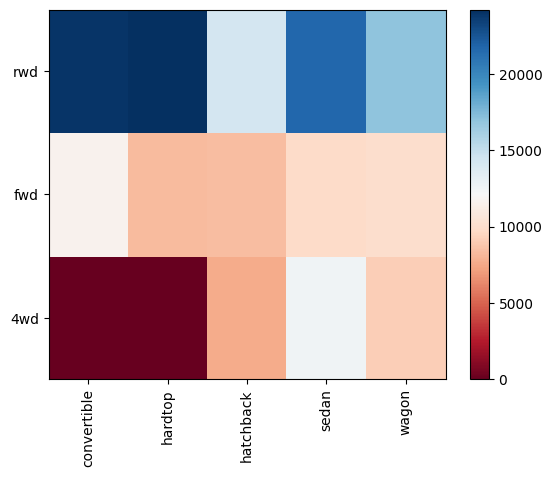

In [211]:

fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

##Pearson Correlation

The Pearson Correlation measures the linear dependence between two variables X and Y.

The resulting coefficient is a value between -1 and 1 inclusive, where:

1: Perfect positive linear correlation.

0: No linear correlation, the two variables most likely do not affect each other.

-1: Perfect negative linear correlation.

##P-value

What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

By convention, when the

p-value is < 0.001: we say there is strong evidence that the correlation is significant.

the p-value is < 0.05: there is moderate evidence that the correlation is significant.

the p-value is < 0.1: there is weak evidence that the correlation is significant.


the p-value is > 0.1: there is no evidence that the correlation is significant.

###Wheel-Base vs. Price
Let's calculate the Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price'.



In [212]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270732885e-20


Since the p-value is < 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585).

###Horsepower vs. Price
Let's calculate the Pearson Correlation Coefficient and P-value of 'horsepower' and 'price'.



In [53]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is 0.8096068016571054  with a P-value of P =  6.273536270650351e-48


Since the p-value is < 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1).

###Length vs. Price
Let's calculate the Pearson Correlation Coefficient and P-value of 'length' and 'price'.

In [54]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is 0.6906283804483639  with a P-value of P =  8.01647746615924e-30


Since the p-value is < 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).

##Width vs. Price
Let's calculate the Pearson Correlation Coefficient and P-value of 'width' and 'price'.

In [55]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value )

The Pearson Correlation Coefficient is 0.7512653440522673  with a P-value of P = 9.20033551048206e-38


Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).

###Curb-Weight vs. Price
Let's calculate the Pearson Correlation Coefficient and P-value of 'curb-weight' and 'price':

In [56]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is 0.8344145257702843  with a P-value of P =  2.189577238893965e-53


Since the p-value is < 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).

###Engine-Size vs. Price
Let's calculate the Pearson Correlation Coefficient and P-value of 'engine-size' and 'price':

In [57]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622198793e-64


Since the p-value is < 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).

###Bore vs. Price
Let's calculate the Pearson Correlation Coefficient and P-value of 'bore' and 'price':

In [58]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value )

The Pearson Correlation Coefficient is 0.5431553832626602  with a P-value of P =   8.049189483935315e-17


Since the p-value is < 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).

###City-mpg vs. Price
Let's calculate the Pearson Correlation Coefficient and P-value of 'city-mpg' and 'price':

In [59]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is -0.6865710067844678  with a P-value of P =  2.3211320655675098e-29


Since the p-value is < 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of about -0.687 shows that the relationship is negative and moderately strong.

###Highway-mpg vs. Price
Let's calculate the Pearson Correlation Coefficient and P-value of 'highway-mpg' and 'price'

In [60]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value )

The Pearson Correlation Coefficient is -0.704692265058953  with a P-value of P =  1.749547114447557e-31


Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of about -0.705 shows that the relationship is negative and moderately strong.

##Conclusion: Important Variables
We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:

Continuous numerical variables: Length, Width, Curb-weight, Engine-size, Horsepower, City-mpg, Highway-mpg, Wheel-base, Bore

Categorical variables: Drive-wheels

As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.

#Model Development
## Linear Regression

In [ ]:
#create the linear regression object
lm = LinearRegression()
#how could highway-mpg predict price?
X = df[['highway-mpg']]
Y = df['price']
lm.fit(X,Y)
Yhat=lm.predict(X)
Yhat[0:5]

In [ ]:
#Train the model using "engine-size" as the independent variable and "price" as the dependent variable?
T=df[['engine-size']]
lm.fit(T,Y)

##Multiple Linear Regression


In [ ]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(Z, df['price'])
print('coefficient:',lm.coef_)

Create and train a Multiple Linear Regression model "lm2" where the response variable is "price", and the predictor variable is "normalized-losses" and "highway-mpg".

In [ ]:
Z=df[['normalized-losses','highway-mpg']]
lm2=LinearRegression()
lm2.fit(Z,df['price'])
print('coefficient:',lm2.coef_)

##Model Evaluation Using Visualization
###Regression Plot - Linear Regression
Let's visualize highway-mpg as potential predictor variable of price:

(0.0, 48164.68103444343)

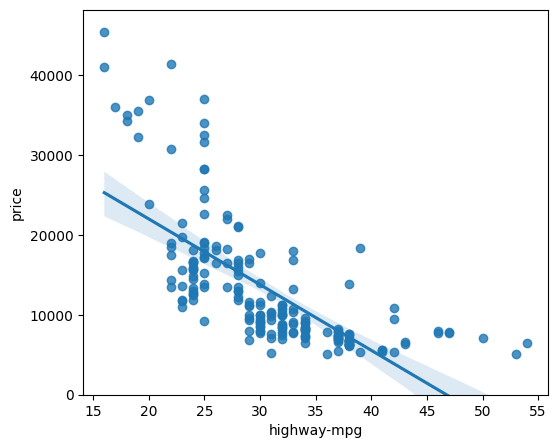

In [214]:
width = 6
height = 5
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

We can see from this plot that price is negatively correlated to highway-mpg since the regression slope is negative.

One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data.

Let's compare this plot to the regression plot of "peak-rpm".

(0.0, 47414.1)

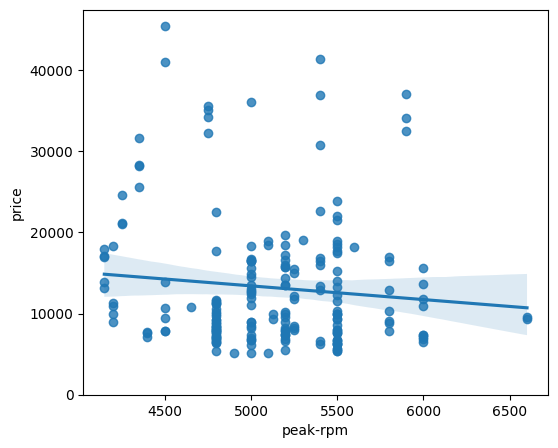

In [215]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

Comparing the regression plot of "peak-rpm" and "highway-mpg", we see that the points for "highway-mpg" are much closer to the generated line and, on average, decrease. The points for "peak-rpm" have more spread around the predicted line and it is much harder to determine if the points are decreasing or increasing as the "peak-rpm" increases.

The variable "highway-mpg" has a stronger correlation with "price", it is approximate -0.704692  compared to "peak-rpm" which is approximate -0.101616. You can verify it using the following command:

In [216]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


###Residual Plot - Linear Regression
A good way to visualize the variance of the data is to use a residual plot.

What is a residual?

The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

So what is a residual plot?

A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

What do we pay attention to when looking at a residual plot?

We look at the spread of the residuals:

- If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data.

Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.

Let's visualize the residual plot of highway-mpg as potential predictor variable of price:

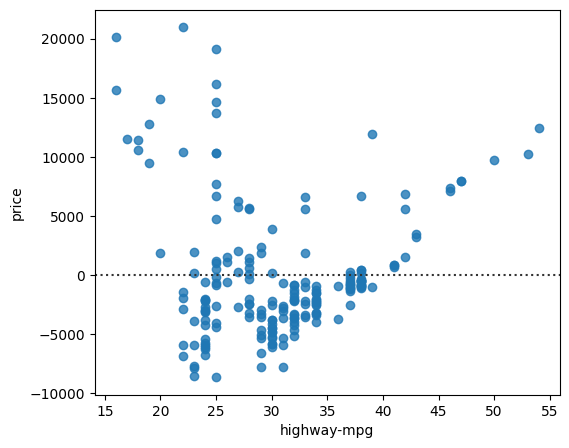

In [114]:
width = 6
height = 5
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.

###Distribution Plot - Multiple Linear Regression

In [ ]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Y_hat = lm.predict(Z)
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

##Polynomial Regression and Pipelines

In [218]:
#function to plot the data
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


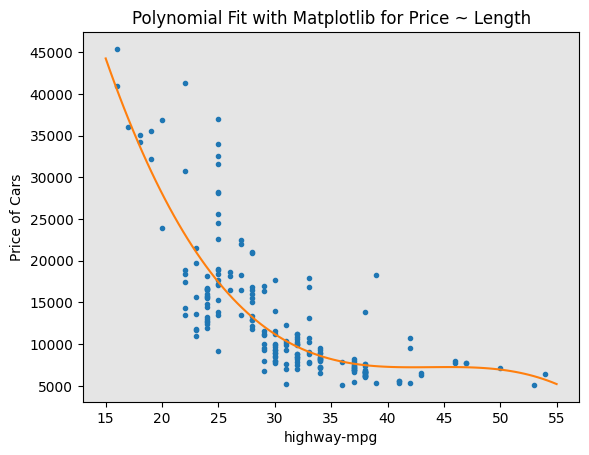

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [219]:
x = df['highway-mpg']
y = df['price']
# Here we use a polynomial of the 3rd order (cubic)
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)
PlotPolly(p, x, y, 'highway-mpg')
np.polyfit(x, y, 3)

We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function "hits" more of the data points.

We can perform a polynomial transform on multiple features. First, we import the module:

In [220]:
#We create a PolynomialFeatures object of degree 2:
pr=PolynomialFeatures(degree=2)
Z_pr=pr.fit_transform(Z)

##Pipeline

In [221]:
#We create the pipeline by creating a list of tuples including the name of the model
#or estimator and its corresponding constructor.
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)

#First, we convert the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs.
Z = Z.astype(float)
#Then, we can normalize the data, perform a transform and fit the model simultaneously.
pipe.fit(Z,y)
#Similarly, we can normalize the data, perform a transform and produce a prediction simultaneously.
ypipe=pipe.predict(Z)

##Measures for In-Sample Evaluation

###Model 1 simple linear regression

In [222]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The R-square is:  0.4965911884339176
The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]
The mean square error of price and predicted value is:  31635042.944639888


###Model 2: multiple linear regression

In [223]:
# fit the model
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))
Y_predict_multifit = lm.predict(Z)
print('The mean square error of price and predicted value using multifit is: ', mean_squared_error(df['price'], Y_predict_multifit))

The R-square is:  0.8093732522175299
The mean square error of price and predicted value using multifit is:  11979300.34981888


###Model 3: polynomial fit

In [224]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)
print('MSE: ',mean_squared_error(df['price'], p(x)))

The R-square value is:  0.674194666390652
MSE:  20474146.426361218


##Prediction and Decision Making

Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?

*What is a good R-squared value?*

When comparing models, the model with the higher R-squared value is a better fit for the data.

*What is a good MSE?*

When comparing models, the model with the smallest MSE value is a better fit for the data.

Let's take a look at the values for the different models.

**Simple Linear Regression**: Using Highway-mpg as a Predictor Variable of Price.

R-squared: 0.49659118843391759

MSE: 3.16 x10^7

**Multiple Linear Regression**: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.

R-squared: 0.80896354913783497

MSE: 1.2 x10^7

**Polynomial Fit**: Using Highway-mpg as a Predictor Variable of Price.

R-squared: 0.6741946663906514

MSE: 2.05 x 10^7
###Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)
Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and even act as noise. As a result, you should always check the MSE and R^2.

In order to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.

MSE: The MSE of SLR is 3.16x10^7 while MLR has an MSE of 1.2 x10^7. The MSE of MLR is much smaller.

R-squared: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR.
The R-squared for the SLR (0.497) is very small compared to the R-squared for the MLR (~0.809). This R-squared in combination with the MSE show that MLR seems like the better model fit in this case compared to SLR.

###Simple Linear Model (SLR) vs. Polynomial Fit
MSE: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.

R-squared: The R-squared for the Polynomial Fit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.

Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting "price" with "highway-mpg" as a predictor variable.

###Multiple Linear Regression (MLR) vs. Polynomial Fit

MSE: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.

R-squared: The R-squared for the MLR is also much larger than for the Polynomial Fit.

##Conclusion
Comparing these three models, we conclude that the MLR model is the best model to be able to predict price from our dataset. This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.

#Model evaluation and refinement
Functions for Plotting

In [91]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.show()
    plt.close()

In [92]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))


    #training data
    #testing data
    # lr:  linear regression object
    #poly_transform:  polynomial transformation object

    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

##Training and Testing data

In [225]:
y_data = df['price']
x_data=df.drop('price',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 21
number of training samples: 180


###Model 2 - Multiple linear regression

In [226]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)
#Prediction using training data
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]
#Prediction using test data
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.68099115,  5884.25292475, 11208.31007475,  6641.03017109,
       15565.98722248])

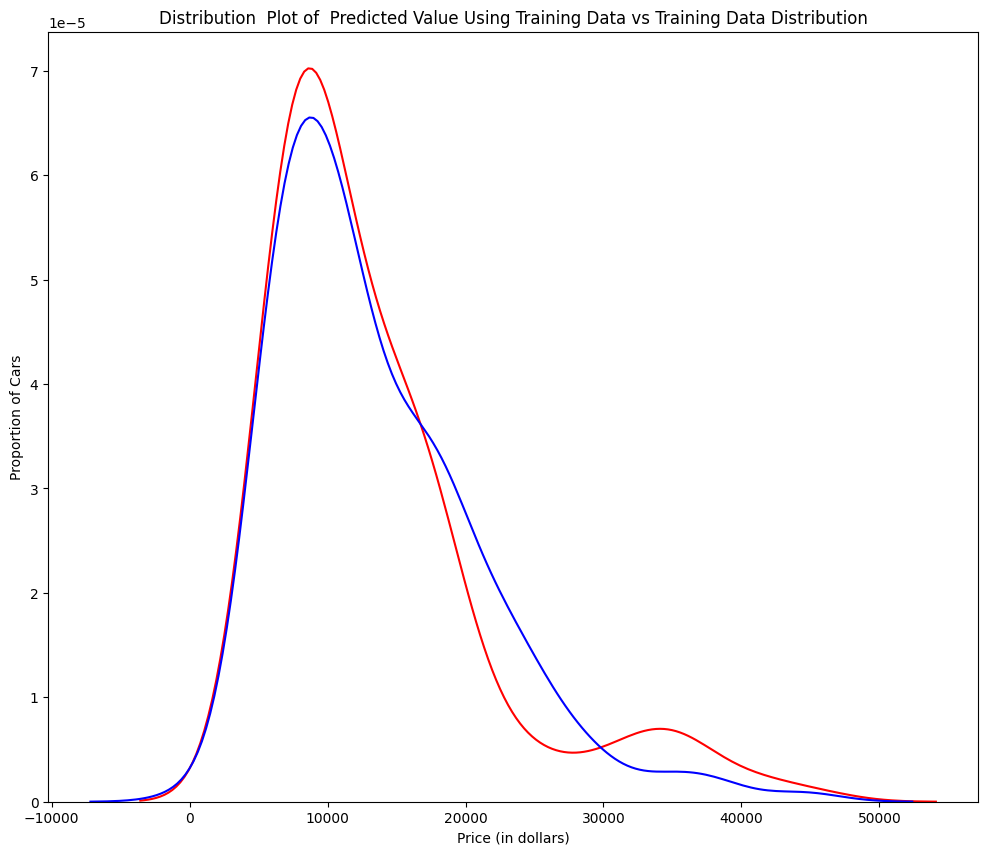

In [227]:
#Let's examine the distribution of the predicted values of the training data
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

So far, the model seems to be doing well in learning from the training dataset. But what happens when the model encounters new data from the testing dataset? When the model generates new values from the test data, we see the distribution of the predicted values is much different from the actual target values.

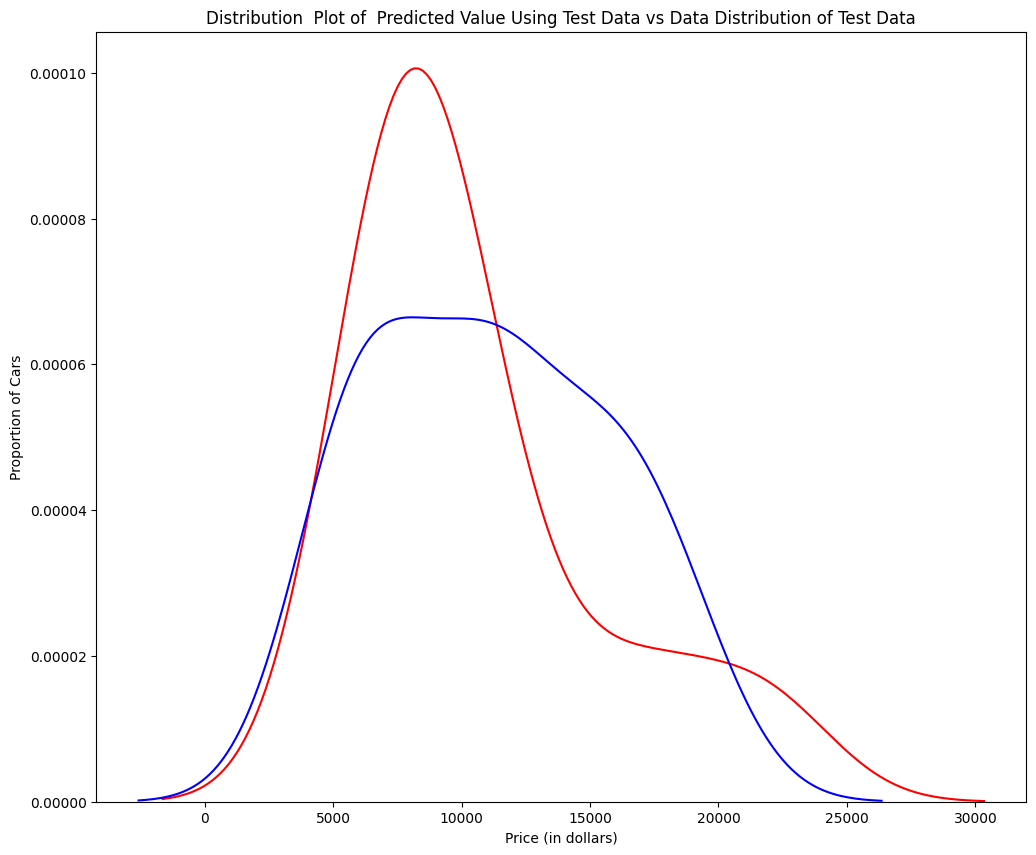

In [228]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Comparing Figure 1 and Figure 2, it is evident that the distribution of the test data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent in the range of 5000 to 15,000. This is where the shape of the distribution is extremely different. Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.

Let's use 55 percent of the data for training and the rest for testing:

Predicted values: [ 6727.58219945  7306.70943225 12213.70783901 18895.03307984]
True values: [ 6295. 10698. 13860. 13499.]


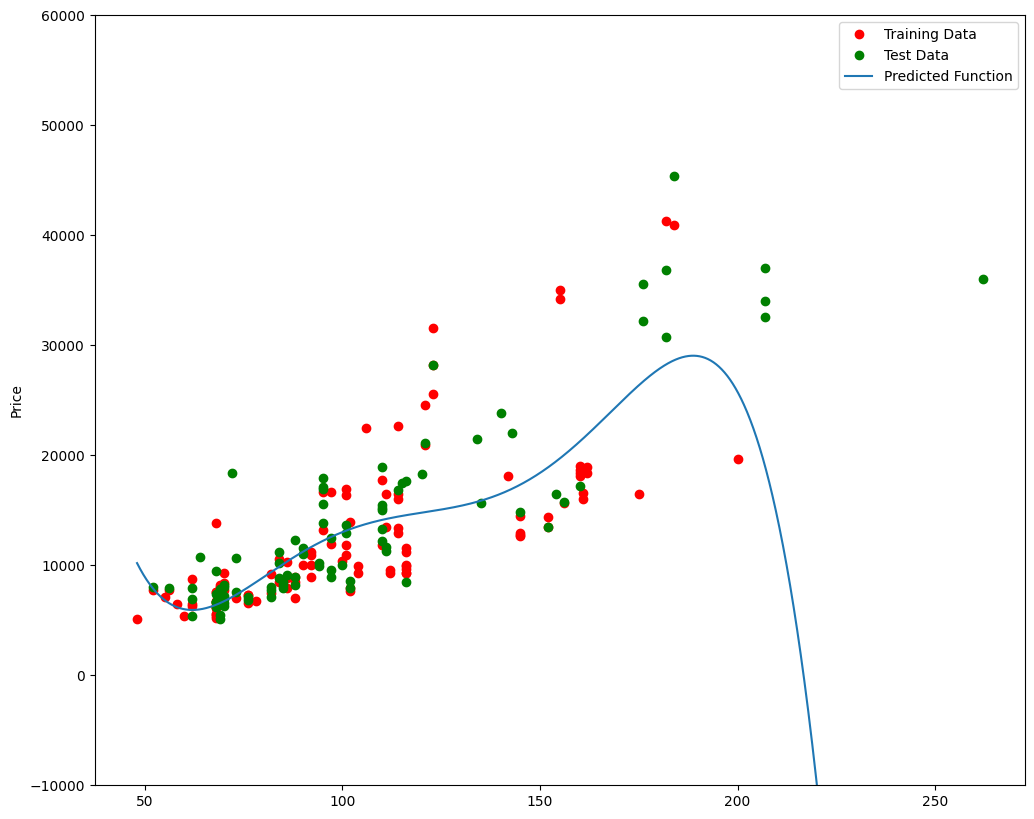

In [229]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
#create a Linear Regression model "poly" and train it.
poly = LinearRegression()
poly.fit(x_train_pr, y_train)
#We can see the output of our model using the method "predict." We assign the values to "yhat".
yhat = poly.predict(x_test_pr)
#Let's take the first five predicted values and compare it to the actual targets.
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)
# display the training data, testing data, and the predicted function.
PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points.

In [230]:
#R^2 of the training data:
print('R^2 of the training data: ', poly.score(x_train_pr, y_train))
#R^2 of the test data
print('R^2 of the testing data: ', poly.score(x_test_pr, y_test))

R^2 of the training data:  0.5568527853920284
R^2 of the testing data:  -29.815556299616322


We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87. The lower the R^2, the worse the model. A negative R^2 is a sign of overfitting.

Let's see how the R^2 changes on the test data for different order polynomials and then plot the results:

Text(3, 0.75, 'Maximum R^2 ')

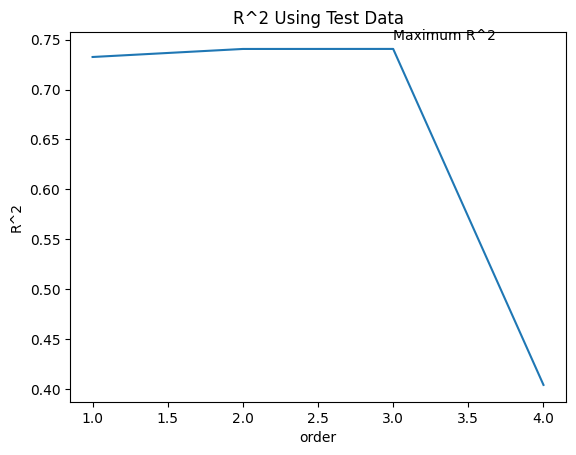

In [231]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)

    x_train_pr = pr.fit_transform(x_train[['horsepower']])

    x_test_pr = pr.fit_transform(x_test[['horsepower']])

    lr.fit(x_train_pr, y_train)

    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')

In [99]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

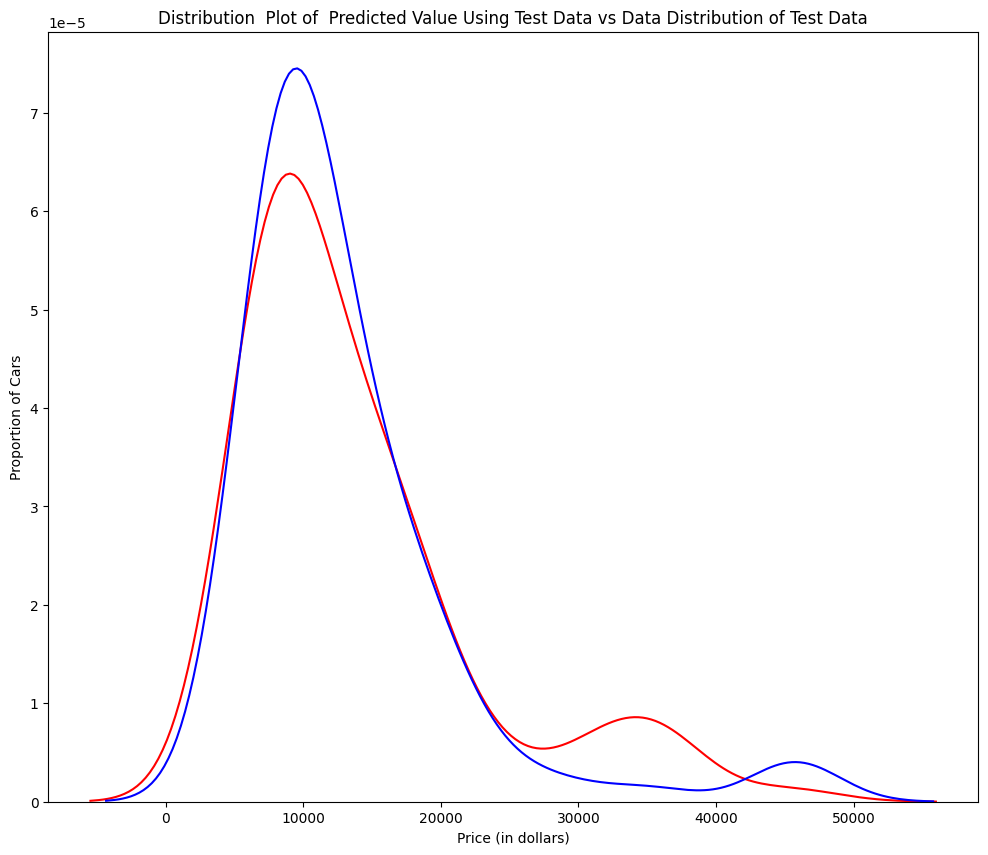

In [232]:
#We can perform polynomial transformations with more than one feature. Create a "PolynomialFeatures" object "pr1" of degree two.
pr1 = PolynomialFeatures(degree=2)
#Transform the training and testing samples for the features 'horsepower', 'curb-weight',
#'engine-size' and 'highway-mpg'. Hint: use the method "fit_transform".
x_train_pr1 = pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr1 = pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
#Create a linear regression model "poly1". Train the object using the method "fit" using the polynomial features.
poly1=LinearRegression()
poly1.fit(x_train_pr1,y_train)

yhat_test1=poly1.predict(x_test_pr1)
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

In [233]:
#R^2 of the training data:
print('R^2 of the training data: ', poly1.score(x_train_pr1, y_train))
#R^2 of the test data
print('R^2 of the testing data: ', poly1.score(x_test_pr1, y_test))

R^2 of the training data:  0.8530601832385493
R^2 of the testing data:  0.6044870441601328


The predicted value is higher than actual value for cars where the price 10000 dollar range, conversely the predicted price is lower than the price cost in the 30,000 dollar to 40,000 dollar range. As such the model is not as accurate in these ranges

##Ridge Regression

In this section, we will review Ridge Regression and see how the parameter alpha changes the model.

Let's perform a degree two polynomial transformation on our data.

In [107]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
RigeModel=Ridge(alpha=1)
RigeModel.fit(x_train_pr, y_train)
yhat = RigeModel.predict(x_test_pr)
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6572.19586866  9634.40697746 20948.17104272 19403.38016094]
test set : [ 6295. 10698. 13860. 13499.]


We select the value of alpha that minimizes the test error. To do so, we can use a for loop. We have also created a progress bar to see how many iterations we have completed so far.

In [108]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha)
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)

    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:12<00:00, 80.98it/s, Test Score=0.564, Train Score=0.859]


We can plot out the value of R^2 for different alphas:

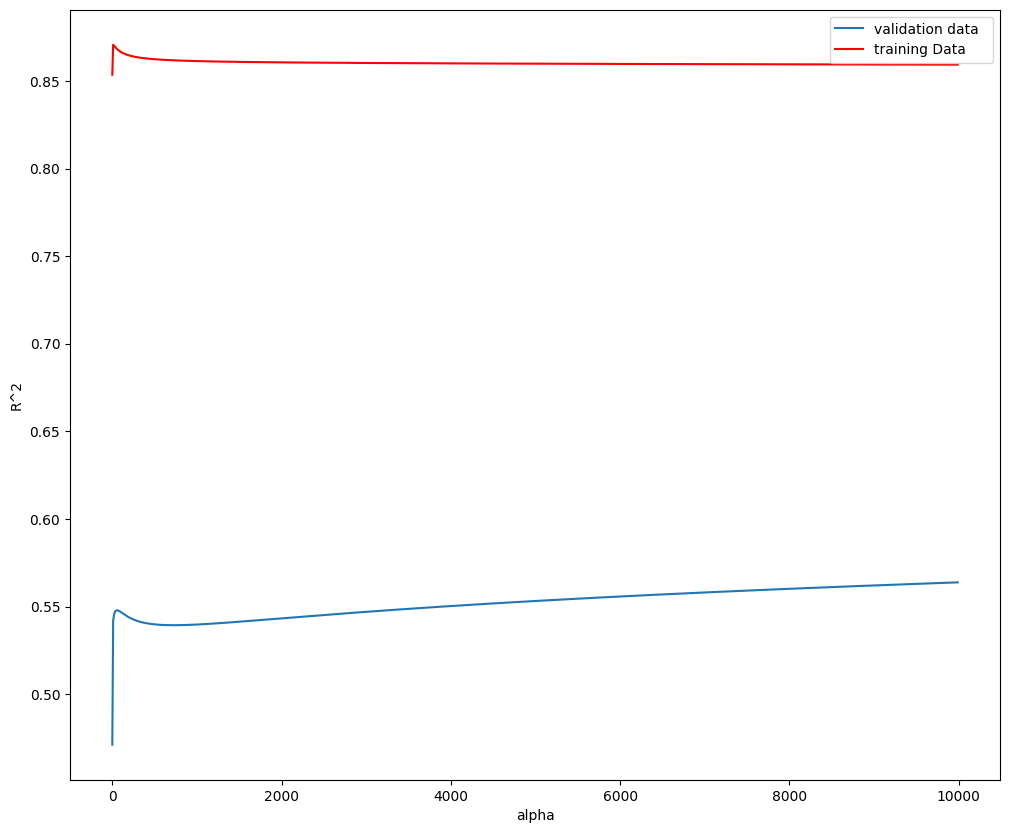

In [109]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

Here the model is built and tested on the same data, so the training and test data are the same.

The red line in Figure 4 represents the R^2 of the training data. As alpha increases the R^2 decreases. Therefore, as alpha increases, the model performs worse on the training data

The blue line represents the R^2 on the validation data. As the value for alpha increases, the R^2 increases and converges at a point.

## Grid search

In [111]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
RR=Ridge()
Grid1 = GridSearchCV(RR, parameters1,cv=4)
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)
#The object finds the best parameter values on the validation data
BestRR=Grid1.best_estimator_
print('best parameter: ',BestRR)
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

best parameter:  Ridge(alpha=10000)


0.8411781387793232